## Gradient Boosting Algorithm - Titanic Dataset

In [121]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [122]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
df.shape

(891, 12)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
s= df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [126]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Seperate X and Y Features

In [127]:
X = df.drop(labels=['PassengerId','Name','Ticket','Survived'],axis = 1)
Y = df[['Survived']]

In [128]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [129]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Creating a pipeline for preprocessing

In [130]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [131]:
cat

['Sex', 'Cabin', 'Embarked']

In [132]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [133]:
cat1 = ['Cabin']
cat2 = ['Sex','Embarked']

### Preprocessing a pipeline

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [135]:
# Num Pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Pipeline for cabin column
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='Unknown')),
                            ('Ohe',OneHotEncoder(handle_unknown='ignore'))])

# Pipeline for remaining features
cat_pipe2 = Pipeline(steps=[('imuter',SimpleImputer(strategy='most_frequent')),
                            ('Ohe',OneHotEncoder(handle_unknown='ignore'))])

# Compose
from sklearn.compose import ColumnTransformer
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [136]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [137]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'c

In [138]:
len(cols)

158

In [139]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat1__Cabin_F38,cat1__Cabin_F4,cat1__Cabin_G6,cat1__Cabin_T,cat1__Cabin_Unknown,cat2__Sex_female,cat2__Sex_male,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [140]:
X_pre.isna().sum()

num__Pclass         0
num__Age            0
num__SibSp          0
num__Parch          0
num__Fare           0
                   ..
cat2__Sex_female    0
cat2__Sex_male      0
cat2__Embarked_C    0
cat2__Embarked_Q    0
cat2__Embarked_S    0
Length: 158, dtype: int64

In [141]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

### Train-Test Split

In [142]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2, random_state=21)

In [143]:
xtrain.shape

(712, 158)

In [144]:
xtest.shape

(179, 158)

In [145]:
ytrain.shape

(712, 1)

In [146]:
ytest.head

<bound method NDFrame.head of      Survived
617         0
379         0
725         0
826         0
450         0
..        ...
61          1
166         1
123         1
625         0
847         0

[179 rows x 1 columns]>

### Model Creation

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=21)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=21)

In [148]:
## model accuracy
model.score(xtrain,ytrain)

0.9087078651685393

In [149]:
model.score(xtest,ytest)

0.8324022346368715

### Hyper parameter tuning

In [150]:
params = {'learning_rate':[0.001, 0.01, 0.05, 0.1],
          'n_estimators':[10,50,100,200],
          'max_depth':[3,4,5,6,7,8,9,10],
          'min_samples_split':[6,7,8,9,10]}

In [151]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier(random_state=42)
rscv = RandomizedSearchCV(gbc, param_distributions= params, cv =5, scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [152]:
rscv.best_score_

0.7386081998121365

In [153]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05, min_samples_split=6,
                           n_estimators=200, random_state=42)

In [154]:
best_gbc.score(xtrain,ytrain)

0.9044943820224719

In [155]:
best_gbc.score(xtest,ytest)

0.8379888268156425

### Predicting training and testing data

In [156]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [157]:
ypred_tr[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [158]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [159]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### Confusion Matrix

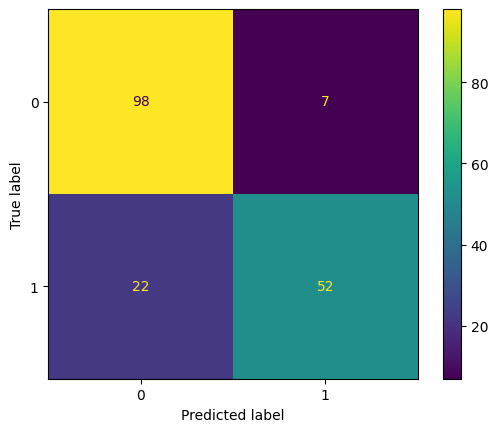

In [161]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### Perform Classification Report

In [162]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       105
           1       0.88      0.70      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



## Use this model for prediction

In [166]:
def predict_data(pre,model,file_path):
    # Read the dataset
    xnew = pd.read_csv(file_path)

    # Preprocessing
    xnew_pre = pre.transform(xnew)
    xnew_pre = pd.DataFrame(xnew_pre, columns=pre.get_feature_names_out())

    # Predicting
    pred = model.predict(xnew_pre)

    # Get the acutal labels
    #pred_lb = le.inverse_transform(pred)

    # Storing values in dataframe
    xnew['Survived']=pred  

    xnew.to_csv('Survived_Predictions.csv',index=False)

    return xnew